In [1]:
import os
import PIL as Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir='cat/'
filepaths=[]
labels=[]
folds=os.listdir(train_data_dir)
for fold in folds:
    fpath=os.path.join(train_data_dir,fold)
    fpaths=os.listdir(fpath)
    for i in fpaths:
        fi_path=os.path.join(fpath,i)
        filepaths.append(fi_path)
        labels.append(fold)
fseries=pd.Series(filepaths,name='filepaths')
lseries=pd.Series(labels,name='labels')
df=pd.concat([fseries,lseries],axis=1)
df

,filepaths,labels
0,cat/Maine Coon\46448387_30064.jpg,Maine Coon
1,cat/Maine Coon\46450124_29900.jpg,Maine Coon
2,cat/Maine Coon\46459729_28842.jpg,Maine Coon
3,cat/Maine Coon\46463715_28449.jpg,Maine Coon
4,cat/Maine Coon\46468296_27966.jpg,Maine Coon
...,...,...
195,cat/Turkish Angora\25719155_1901.jpg,Turkish Angora
196,cat/Turkish Angora\25767737_1895.jpg,Turkish Angora
197,cat/Turkish Angora\25778269_1892.jpg,Turkish Angora
198,cat/Turkish Angora\7844895_3525.jpg,Turkish Angora


## Visualization

In [3]:
count =df['labels'].value_counts()
count

labels
Maine Coon        100
Turkish Angora    100
Name: count, dtype: int64

C:\Users\andif\AppData\Local\Temp\ipykernel_16880\2806793422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,palette='viridis')


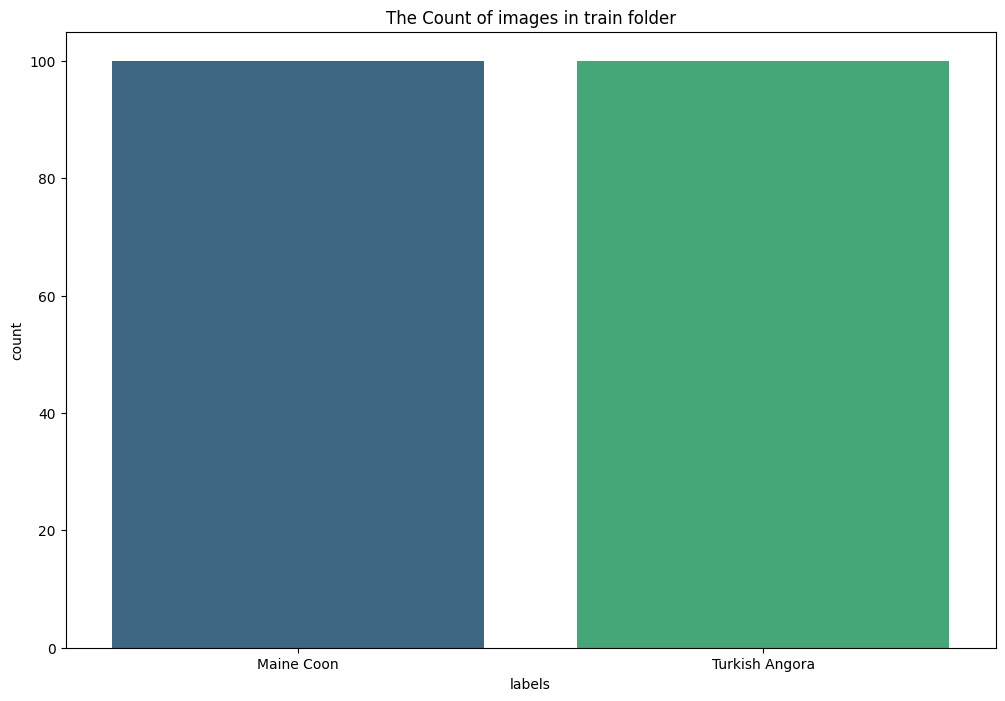

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title('The Count of images in train folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [5]:
train_df , dummy_df=train_test_split(df,test_size=0.2,shuffle=True,random_state=42)
valid_df,test_df=train_test_split(df,test_size=0.4,shuffle=True,random_state=42)

In [6]:
train_df

,filepaths,labels
79,cat/Maine Coon\46647159_4638.jpg,Maine Coon
197,cat/Turkish Angora\25778269_1892.jpg,Turkish Angora
38,cat/Maine Coon\46555746_18088.jpg,Maine Coon
24,cat/Maine Coon\46513438_23039.jpg,Maine Coon
122,cat/Turkish Angora\22950072_2258.jpg,Turkish Angora
...,...,...
106,cat/Turkish Angora\22129270_2346.jpg,Turkish Angora
14,cat/Maine Coon\46494898_25189.jpg,Maine Coon
92,cat/Maine Coon\46678244_121.jpg,Maine Coon
179,cat/Turkish Angora\25162517_1967.jpg,Turkish Angora


In [7]:
test_df

,filepaths,labels
95,cat/Maine Coon\46685210_103.jpg,Maine Coon
15,cat/Maine Coon\46495795_25050.jpg,Maine Coon
30,cat/Maine Coon\46531982_20915.jpg,Maine Coon
158,cat/Turkish Angora\24298914_2084.jpg,Turkish Angora
128,cat/Turkish Angora\23043894_2243.jpg,Turkish Angora
...,...,...
113,cat/Turkish Angora\22557245_2303.jpg,Turkish Angora
26,cat/Maine Coon\46518881_22265.jpg,Maine Coon
139,cat/Turkish Angora\23249389_2210.jpg,Turkish Angora
100,cat/Turkish Angora\21988680_2364.jpg,Turkish Angora


In [8]:
valid_df

,filepaths,labels
2,cat/Maine Coon\46459729_28842.jpg,Maine Coon
77,cat/Maine Coon\46646784_4738.jpg,Maine Coon
46,cat/Maine Coon\46561653_17328.jpg,Maine Coon
187,cat/Turkish Angora\25428190_1934.jpg,Turkish Angora
191,cat/Turkish Angora\25570065_1912.jpg,Turkish Angora
...,...,...
106,cat/Turkish Angora\22129270_2346.jpg,Turkish Angora
14,cat/Maine Coon\46494898_25189.jpg,Maine Coon
92,cat/Maine Coon\46678244_121.jpg,Maine Coon
179,cat/Turkish Angora\25162517_1967.jpg,Turkish Angora


In [9]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 160 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.


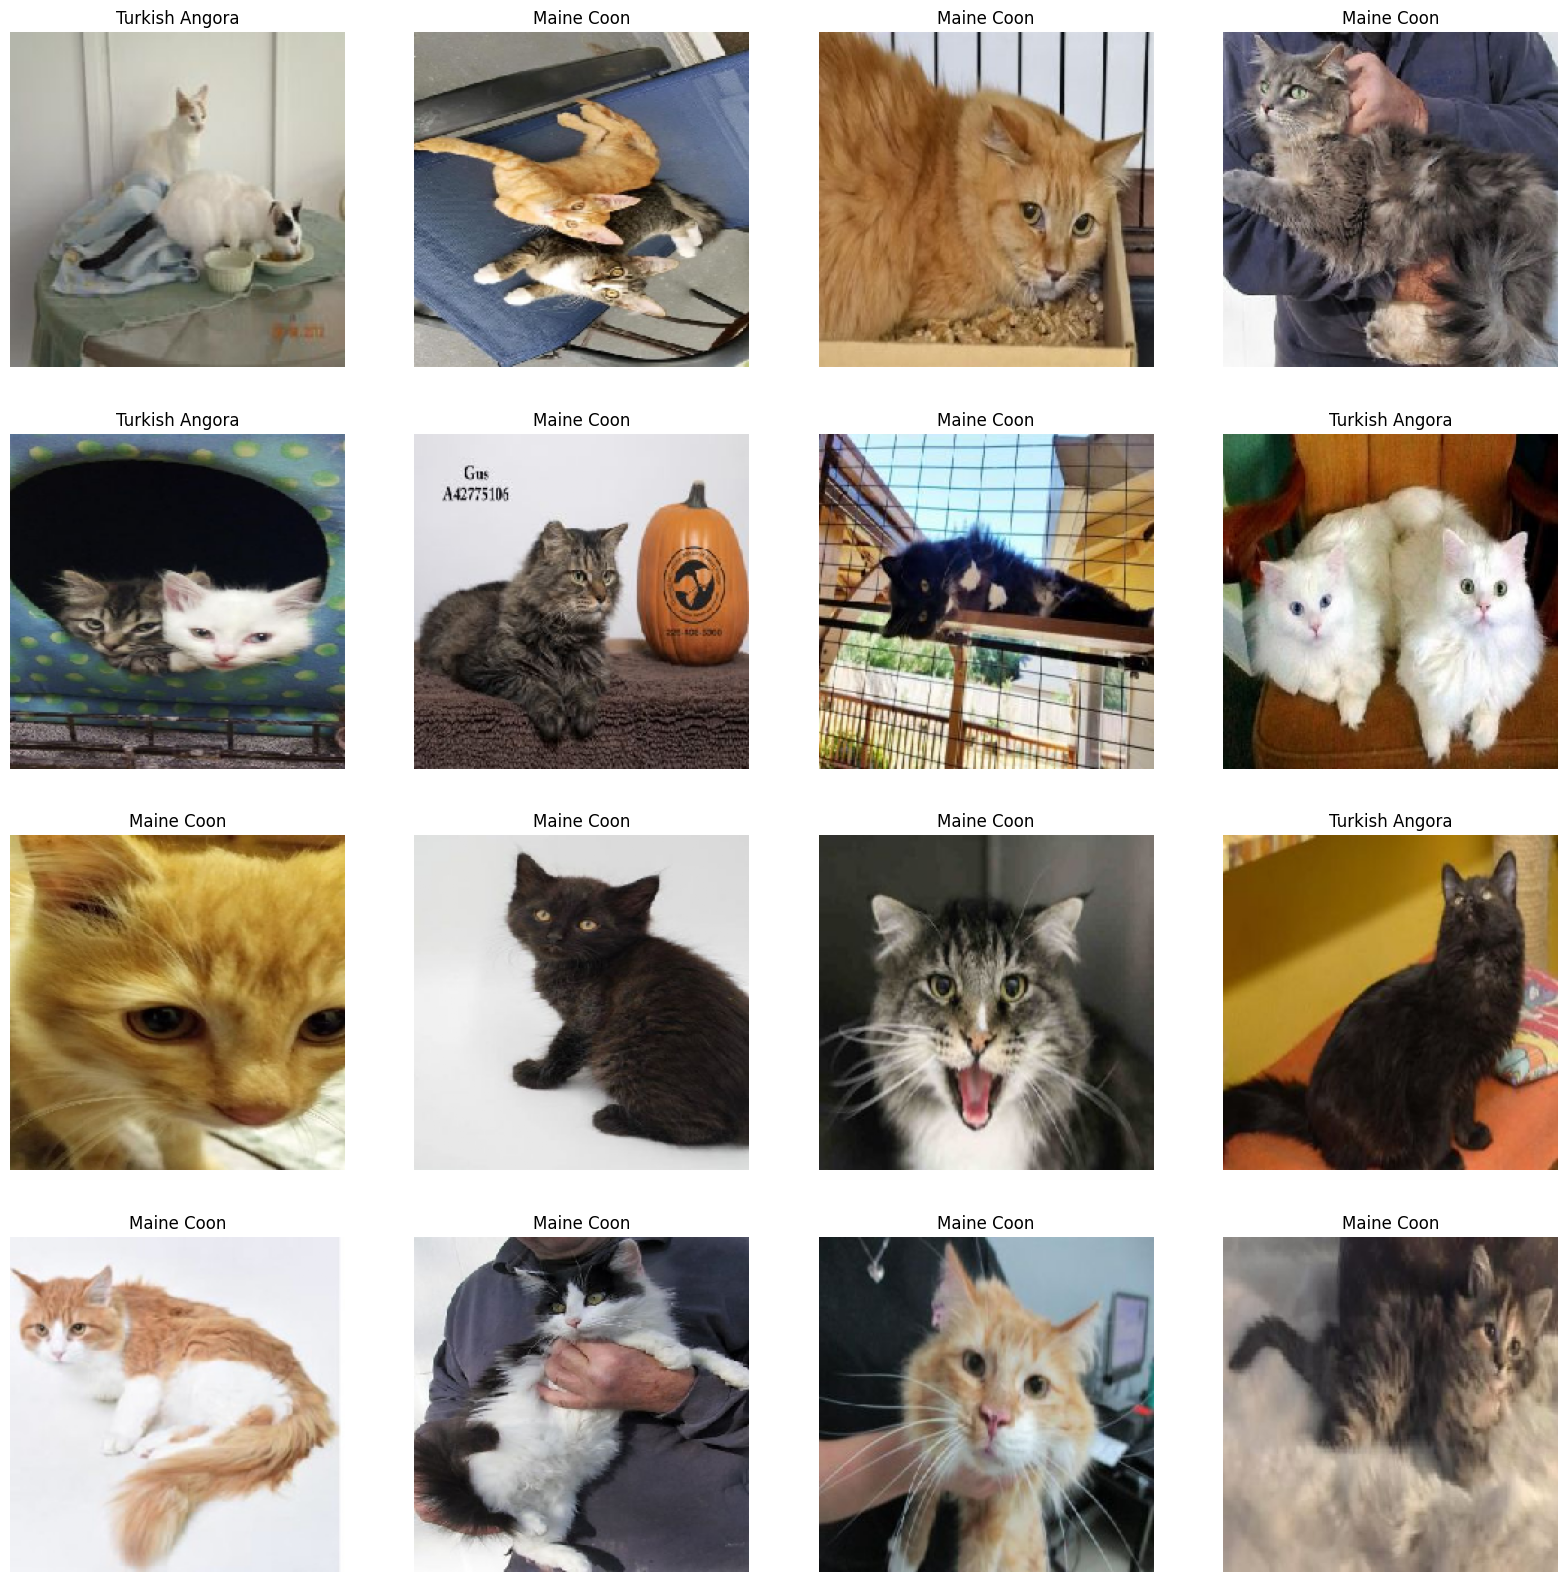

In [10]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(len(classes), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)


history = model.fit(
    train_gen,
    epochs=50,  # Increased epochs for better convergence potential
    validation_data=valid_gen,
    callbacks=[early_stopping] # Added early stopping
)


# Evaluate the model
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy}")

c:\personal\Code\S6\Penggalian-Data\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\personal\Code\S6\Penggalian-Data\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 508ms/step - accuracy: 0.5156 - loss: 200.4031 - val_accuracy: 0.5750 - val_loss: 0.7294
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.5753 - loss: 1.3645 - val_accuracy: 0.8333 - val_loss: 0.4343
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 386ms/step - accuracy: 0.8188 - loss: 0.5070 - val_accuracy: 0.8583 - val_loss: 0.3145
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 474ms/step - accuracy: 0.8081 - loss: 0.3886 - val_accuracy: 0.9500 - val_loss: 0.1962
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.9121 - loss: 0.2380 - val_accuracy: 0.9583 - val_loss: 0.1618
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - accuracy: 0.8760 - loss: 0.5776 - val_accuracy: 0.8833 - val_loss: 0.3738
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.8948 - loss: 0.3261 - val_accuracy: 0.9833 - val_loss: 0.1413
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step - accuracy: 0.9315 - loss: 0.2881 - val_accuracy: 

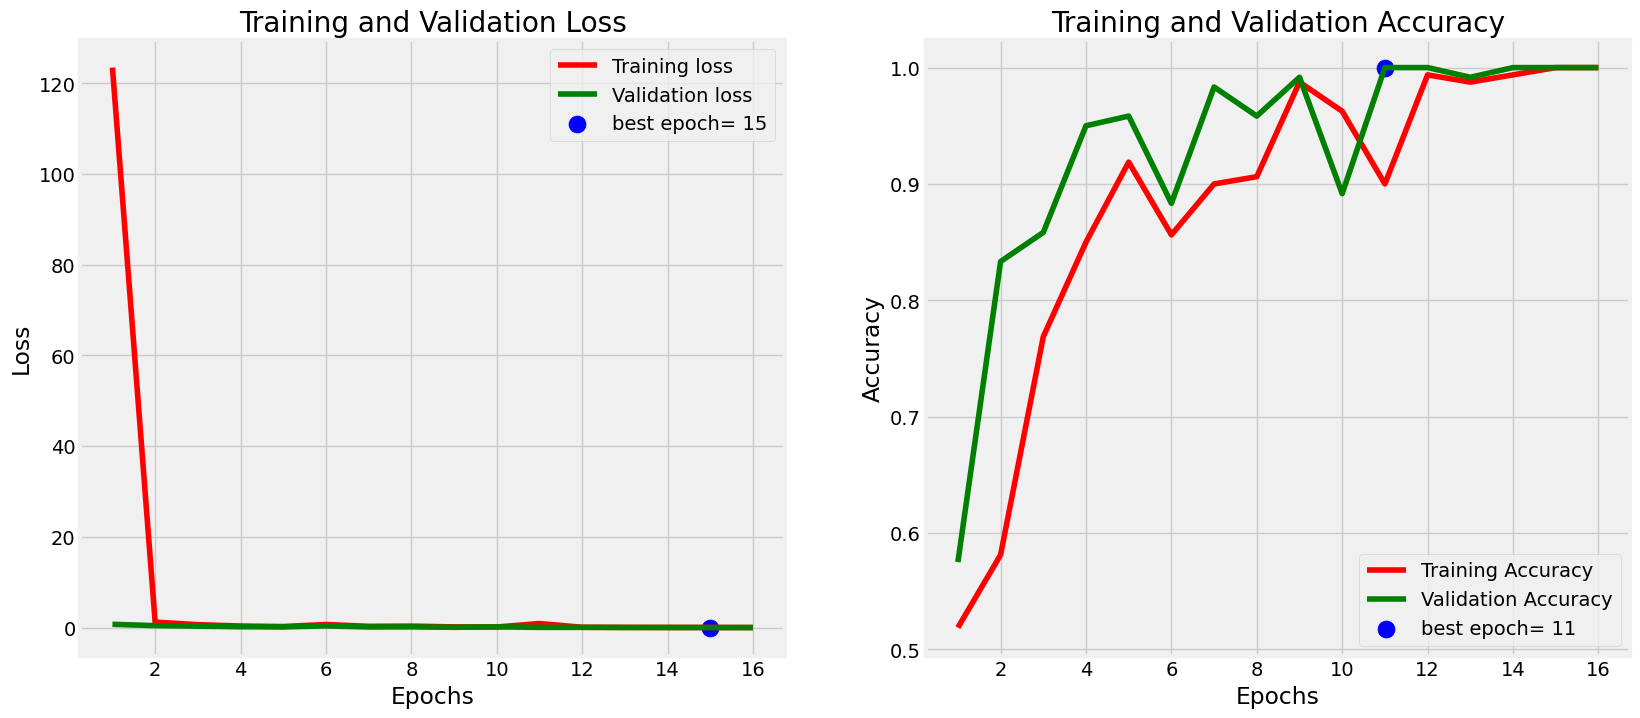

In [12]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [13]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.0516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7500 - loss: 1.4483
Train Loss:  0.04512227699160576
Train Accuracy:  1.0
--------------------
Valid Loss:  0.051630519330501556
Valid Accuracy:  1.0
--------------------
Test Loss:  1.4482665061950684
Test Accuracy:  0.75
